In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import tree
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from load_data import *

# Data Exploration

In [2]:
data_path = "../data/with_stock_data.csv"
frame = pd.read_csv(data_path)
frame.columns

Index(['name', 'domain', 'year founded', 'industry', 'size range', 'city',
       ' state', 'country', ' linkedin url', 'current employee estimate',
       'total employee estimate', 'Score', 'reviews', 'salaries', 'interviews',
       'KMT', 'market_cap', 'enterprise_value', 'trailing_pe', 'forward_pe',
       'peg_ratio_5', 'price_sales', 'price_book', 'enterprise_value_revenue',
       'enterprise_value_ebitda', 'profit_margin', 'operating_margin',
       'return_on_assets', 'return_on_equity', 'revenue', 'revenue_per_share',
       'quarterly_revenue_share', 'gross_profit', 'ebitda',
       'net_income_avi_to_common', 'diluted_eps', 'quarterly_earnings_growth',
       'total_cash', 'total_cash_per_share', 'total_dept',
       'total_dept_per_equity', 'operating_cash_flow',
       'leveraged_free_cash_flow', 'stock_beta_3y', 'stock 52_week',
       'stock_sp500_52_week', 'stock_52_week_high', 'stock_52_week_low'],
      dtype='object')

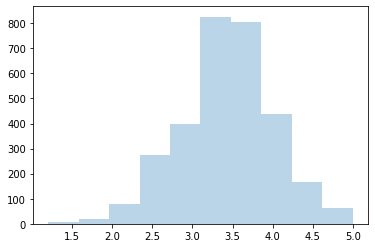

In [3]:
frame['Score']
plt.hist(frame['Score'], alpha=0.3)
plt.show()

# Feature Selection

In [4]:
# Pick Features
# non_categorical_columns = ['year founded', 'current employee estimate', 'total employee estimate', 'reviews', 'salaries', 'interviews', 'market_cap', 'enterprise_value', 'trailing_pe', 'forward_pe', 'peg_ratio_5', 'price_sales', 'price_book', 'enterprise_value_revenue', 'enterprise_value_ebitda', 'profit_margin', 'operating_margin', 'return_on_assets', 'return_on_equity', 'revenue', 'revenue_per_share', 'quarterly_revenue_share', 'gross_profit', 'ebitda', 'net_income_avi_to_common', 'diluted_eps', 'quarterly_earnings_growth', 'total_cash', 'total_cash_per_share', 'total_dept', 'total_dept_per_equity', 'operating_cash_flow', 'leveraged_free_cash_flow', 'stock_beta_3y', 'stock 52_week', 'stock_sp500_52_week', 'stock_52_week_high', 'stock_52_week_low']
# categorical_columns = ['industry', 'size range', 'city', ' state', 'country']
non_categorical_columns = ['trailing_pe', 'leveraged_free_cash_flow', 'operating_cash_flow', 'total_dept_per_equity', 'ebitda', 'net_income_avi_to_common', 'forward_pe', 'total_cash']
categorical_columns = ['city']

In [5]:
x_train, y_train, x_test, y_test, x_test_unseen, y_test_unseen = load_and_clean(non_categorical_columns, categorical_columns)

# General Functions

In [6]:
def convertToClass(Y, k):
    return np.apply_along_axis(lambda elem : np.round(elem * k / 5), 0, Y)

def evaluateRegressionModel(model, x, y):
    y_pred = np.clip(model.predict(x), 0, 5).flatten()
    
    # MSE
    print("Mean Square Error:")
    mse = mean_squared_error(y, y_pred)
    print(mse)
    
    # Accuracy
    print("Accuracy:")
    accuracy = sum(np.abs(y_pred - y.values.flatten()) <  0.25)/ y.shape[0]
    print(accuracy)
    
    # Confusion matrix
    y_pred = convertToClass(y_pred, 10)
    y_actual = convertToClass(y, 10)
    confusion_m = confusion_matrix(y_actual, y_pred)
    print("Confusion Matrix:")
    print(confusion_m)
    return (mse, accuracy, confusion_m)

def evaluateClassificationModel(model, x, y):
    y_pred = model.predict(x)
    confusion_m = confusion_matrix(y, y_pred)
    accuracy = model.score(x, y)
    print("Accuracy:")
    print(accuracy)
    print("Confusion Matrix:")
    print(confusion_m)
    return (accuracy, confusion_m)

# REGRESSION MODEL SECTION

# Linear Regression (L1 Regularization)

In [7]:
linRegL1 = linear_model.Lasso(alpha=0.1, normalize=False)
linRegL1.fit(x_train, y_train)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [8]:
# Training Data
print("ON TRAINING DATA:")
mse, accuracy, confusion_m = evaluateRegressionModel(linRegL1, x_train, y_train)

ON TRAINING DATA:
Mean Square Error:
0.32984975157292884
Accuracy:
0.35339568930459536
Confusion Matrix:
[[  0   0   0   0   0   1   0   0   0]
 [  0   0   0   0   0   5   0   0   0]
 [  0   0   0   0   0  51   0   0   0]
 [  0   0   0   0   1 245   0   0   0]
 [  0   0   0   0   3 631   1   0   0]
 [  0   0   0   0   2 844   0   0   0]
 [  0   0   0   0   0 489   3   0   0]
 [  0   0   0   0   0 149   1   0   0]
 [  0   0   0   0   0  33   0   0   0]]


In [9]:
# ON TEST DATA
print("ON TEST DATA:")
mse, accuracy, confusion_m = evaluateRegressionModel(linRegL1, x_test, y_test)

ON TEST DATA:
Mean Square Error:
0.3688318704188394
Accuracy:
0.34186046511627904
Confusion Matrix:
[[  0   0   0   0   2   0   0   0]
 [  0   0   0   0   9   0   0   0]
 [  0   0   0   0  42   0   0   0]
 [  0   0   0   0 108   0   0   0]
 [  0   0   0   0 138   0   0   0]
 [  0   0   0   2  92   1   0   0]
 [  0   0   0   1  30   0   0   0]
 [  0   0   0   0   5   0   0   0]]


# Linear Regression (L2 Regularization)

In [10]:
# Modeling
linRegL2 = Ridge(alpha=1.0, normalize=False)
linRegL2.fit(x_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.28852e-24): result may not be accurate.
  overwrite_a=True).T


Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [11]:
# Training Data
print("ON TRAINING DATA:")
mse, accuracy, confusion_m = evaluateRegressionModel(linRegL2, x_train, y_train)

ON TRAINING DATA:
Mean Square Error:
0.2145921414867666
Accuracy:
0.4631964213094754
Confusion Matrix:
[[  0   0   0   1   0   0   0   0   0]
 [  0   0   0   3   1   1   0   0   0]
 [  0   0   0   8  24  19   0   0   0]
 [  0   0   0   4 133 106   3   0   0]
 [  0   0   0   5 247 376   7   0   0]
 [  0   0   0   0  77 745  24   0   0]
 [  0   0   0   0  16 417  59   0   0]
 [  0   0   0   0   5  82  63   0   0]
 [  0   0   0   0   1  14  18   0   0]]


In [12]:
# ON TEST DATA
print("ON TEST DATA:")
mse, accuracy, confusion_m = evaluateRegressionModel(linRegL2, x_test, y_test)

ON TEST DATA:
Mean Square Error:
0.3946386763878807
Accuracy:
0.3511627906976744
Confusion Matrix:
[[  0   0   0   0   2   0   0   0]
 [  0   0   0   0   9   0   0   0]
 [  0   0   1   7  31   3   0   0]
 [  0   0   0  21  81   6   0   0]
 [  0   0   0  14 120   4   0   0]
 [  0   0   1  14  72   7   1   0]
 [  0   0   0   7  22   2   0   0]
 [  0   0   0   0   5   0   0   0]]


# Linear Regression

In [13]:
# Modeling
linReg = LinearRegression().fit(x_train, y_train)

In [14]:
# Training Data
print("ON TRAINING DATA:")
mse, accuracy, confusion_m = evaluateRegressionModel(linReg, x_train, y_train)

ON TRAINING DATA:
Mean Square Error:
0.18854382813154763
Accuracy:
0.5612037413582758
Confusion Matrix:
[[  1   0   0   0   0   0   0   0   0]
 [  0   2   0   2   0   1   0   0   0]
 [  0   0  16   4  13  18   0   0   0]
 [  0   0   1  78  67  96   4   0   0]
 [  0   0   0  11 312 297  15   0   0]
 [  0   0   0   1  92 709  44   0   0]
 [  0   0   0   0  27 285 179   1   0]
 [  0   0   0   0   5  76  31  38   0]
 [  0   0   0   0   1  14   8   1   9]]


In [15]:
# ON TEST DATA
print("ON TEST DATA:")
mse, accuracy, confusion_m = evaluateRegressionModel(linReg, x_test, y_test)

ON TEST DATA:
Mean Square Error:
1.1292806182166581
Accuracy:
0.2302325581395349
Confusion Matrix:
[[ 0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  0  0  1]
 [ 0  0  0  0  0  5  0  0  4]
 [ 0  0  0  1  7 21  4  1  8]
 [ 1  0  0  2 21 44 12  1 27]
 [ 0  0  0  2 18 65 10  1 42]
 [ 0  0  1  3 14 45  9  2 21]
 [ 0  0  0  0  8 15  3  0  5]
 [ 0  0  0  0  0  2  0  0  3]]


# Support Vector Regression

In [16]:
# Modeling
svr = SVR().fit(x_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [17]:
# Training Data
print("ON TRAINING DATA:")
mse, accuracy, confusion_m = evaluateRegressionModel(svr, x_train, y_train)

ON TRAINING DATA:
Mean Square Error:
0.33243485040038917
Accuracy:
0.81862545750305
Confusion Matrix:
[[  0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   1   0   0   0   0   0]
 [  0   0   0   0   0   5   0   0   0   0   0]
 [  0   0   0   0   0  46   2   2   1   0   0]
 [  1   0   0   2   0 151  75   7   2   0   8]
 [  5   2   2   2   2  29 412 144  13   7  17]
 [  8   2   6   1   6  19  31 716  22  19  16]
 [  7   0   1   1   0   6   9 149 291  15  13]
 [  1   1   2   0   1   1   1   2  50  89   2]
 [  1   0   0   0   0   0   0   0   3  29   0]]


In [18]:
# ON TEST DATA
print("ON TEST DATA:")
mse, accuracy, confusion_m = evaluateRegressionModel(svr, x_test, y_test)

ON TEST DATA:
Mean Square Error:
0.5173893852653991
Accuracy:
0.313953488372093
Confusion Matrix:
[[  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   2   0   0   0]
 [  0   1   0   0   0   0   8   0   0   0]
 [  0   0   0   0   0   3  37   0   0   2]
 [  0   0   0   1   2   6  94   4   1   0]
 [  1   0   0   0   5   7 121   2   1   1]
 [  0   0   0   0   2   5  85   2   0   1]
 [  1   0   0   0   0   2  25   1   0   2]
 [  0   0   0   0   0   0   5   0   0   0]]


# CLASSIFICATION MODEL SECTION

In [19]:
k = 10
y_train = convertToClass(y_train, k)
y_test = convertToClass(y_test, k)
print("Ran.")

Ran.


# Softmax

In [20]:
softmax = LogisticRegression(multi_class='multinomial', solver='lbfgs')
softmax.fit(x_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [21]:
# Training data
print("ON TRAINING DATA:")
accuracy, confusion_m = evaluateClassificationModel(softmax, x_train, y_train)

ON TRAINING DATA:
Accuracy:
0.2997153314355429
Confusion Matrix:
[[  0   0   0   1   0   0   0   0   0]
 [  0   0   0   0   0   4   1   0   0]
 [  3   0   0   2   1  37   6   0   2]
 [ 26   1   0   5  11 165  36   2   0]
 [ 34   4   1  20  33 433 103   2   5]
 [ 42   4   3  36  20 597 135   1   8]
 [ 24   0   2  22  16 322 100   2   4]
 [  8   5   2   5  10  91  27   1   1]
 [  4   0   0   2   1  19   6   0   1]]


In [22]:
# Testing data
print("ON TESTING DATA:")
accuracy, confusion_m = evaluateClassificationModel(softmax, x_test, y_test)

ON TESTING DATA:
Accuracy:
0.28604651162790695
Confusion Matrix:
[[ 0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  2  0  0  0]
 [ 2  1  0  0  0  4  2  0  0]
 [ 1  0  1  1  3 28  6  0  2]
 [ 2  0  0  3  3 79 18  2  1]
 [ 2  1  0  5  4 97 29  0  0]
 [ 3  0  0  4  2 60 22  1  3]
 [ 1  0  0  2  2 20  5  0  1]
 [ 1  0  0  0  1  3  0  0  0]]


# Support Vector Machine, Kernel = rbf

In [23]:
svm_rbf = SVC(gamma = 'auto', kernel='rbf', C=.8)
svm_rbf.fit(x_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=0.8, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [24]:
# Training data
print("ON TRAINING DATA:")
accuracy, confusion_m = evaluateClassificationModel(svm_rbf, x_train, y_train)

ON TRAINING DATA:
Accuracy:
0.8263521756811713
Confusion Matrix:
[[  0   0   0   0   0   1   0   0   0]
 [  0   0   0   0   0   5   0   0   0]
 [  0   0   0   0   1  50   0   0   0]
 [  0   0   0 200  13  26   7   0   0]
 [  0   0   0   0 580  50   5   0   0]
 [  0   0   0   0  20 826   0   0   0]
 [  0   0   0   0  21  47 424   0   0]
 [  0   0   0   0  11 134   3   2   0]
 [  0   0   0   0   0  32   1   0   0]]


In [25]:
# Testing data
print("ON TESTING DATA:")
accuracy, confusion_m = evaluateClassificationModel(svm_rbf, x_test, y_test)

ON TESTING DATA:
Accuracy:
0.3186046511627907
Confusion Matrix:
[[  0   0   0   0   1   1   0   0]
 [  0   0   0   1   8   0   0   0]
 [  0   0   0   3  39   0   0   0]
 [  0   0   0   5 103   0   0   0]
 [  0   0   0   5 132   1   0   0]
 [  0   0   0   1  94   0   0   0]
 [  0   0   0   1  28   2   0   0]
 [  0   0   0   0   5   0   0   0]]


# Support Vector Machine, Kernel = linear

In [26]:
svm_linear = SVC(gamma = 'auto', kernel='linear', C=1, max_iter=5000)
svm_linear.fit(x_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:241: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
    max_iter=5000, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [27]:
# Training data
print("ON TRAINING DATA:")
accuracy, confusion_m = evaluateClassificationModel(svm_linear, x_train, y_train)

ON TRAINING DATA:
Accuracy:
0.14192761285075234
Confusion Matrix:
[[  0   0   0   1   0   0   0   0   0]
 [  0   1   0   3   1   0   0   0   0]
 [  0   1   1  38   8   2   0   0   1]
 [  0   1   1 198  41   2   0   0   3]
 [  0  11  11 464 119  14   1   1  14]
 [  0  23  12 626 131  28   2   1  23]
 [  0  19   8 360  75  10   2   0  18]
 [  1   1   0 110  28   5   0   0   5]
 [  0   0   2  24   5   1   1   0   0]]


In [28]:
# Testing data
print("ON TESTING DATA:")
accuracy, confusion_m = evaluateClassificationModel(svm_linear, x_test, y_test)

ON TESTING DATA:
Accuracy:
0.14418604651162792
Confusion Matrix:
[[  0   0   0   0   0   0   0   0   0]
 [  0   0   0   2   0   0   0   0   0]
 [  0   0   0   8   1   0   0   0   0]
 [  0   0   0  34   7   0   0   0   1]
 [  0   2   5  72  25   1   2   0   1]
 [  0   5   1 102  21   2   2   0   5]
 [  0   4   0  71  14   1   1   0   4]
 [  1   0   0  21   7   2   0   0   0]
 [  0   0   0   3   2   0   0   0   0]]


# Decision Trees

In [29]:
tree = tree.DecisionTreeClassifier(max_depth = 15)
tree.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=15,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [30]:
# Training data
print("ON TRAINING DATA:")
accuracy, confusion_m = evaluateClassificationModel(tree, x_train, y_train)

ON TRAINING DATA:
Accuracy:
0.6636844245628304
Confusion Matrix:
[[  1   0   0   0   0   0   0   0   0]
 [  0   4   0   0   0   1   0   0   0]
 [  0   0  19   0   6  23   3   0   0]
 [  0   0   0 102  29 108   7   0   0]
 [  0   0   0   4 373 250   7   1   0]
 [  0   0   0   4  37 792  12   1   0]
 [  0   0   0   2  26 214 250   0   0]
 [  0   0   0   1  14  55   6  74   0]
 [  0   0   0   0   3  13   0   0  17]]


In [31]:
# Testing data
print("ON TESTING DATA:")
accuracy, confusion_m = evaluateClassificationModel(tree, x_test, y_test)

ON TESTING DATA:
Accuracy:
0.29069767441860467
Confusion Matrix:
[[ 0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  2  0  0  0]
 [ 0  0  0  0  2  7  0  0  0]
 [ 0  0  0  4  9 24  4  1  0]
 [ 0  0  0  6 27 55 20  0  0]
 [ 1  0  2  8 24 86 15  2  0]
 [ 0  0  1  2 19 58  8  6  1]
 [ 0  0  0  4  7 20  0  0  0]
 [ 0  0  0  0  0  4  1  0  0]]


# Linear Discriminant Analysis

In [32]:
lda = LinearDiscriminantAnalysis()
lda.fit(x_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [33]:
# Training data
print("ON TRAINING DATA:")
accuracy, confusion_m = evaluateClassificationModel(lda, x_train, y_train)

ON TRAINING DATA:
Accuracy:
0.6120374135827572
Confusion Matrix:
[[  0   0   0   0   0   1   0   0   0]
 [  0   4   0   0   0   1   0   0   0]
 [  0   0  27   0   7  11   5   1   0]
 [  0   0   1 123  28  67  22   5   0]
 [  0   1   8  20 368 172  56   8   2]
 [  0   1   8  20  90 632  80  11   4]
 [  0   0   3  13  48 146 273   8   1]
 [  0   0   2   2  13  47  23  63   0]
 [  0   0   0   0   3  12   3   0  15]]


In [34]:
# Testing data
print("ON TESTING DATA:")
accuracy, confusion_m = evaluateClassificationModel(lda, x_test, y_test)

ON TESTING DATA:
Accuracy:
0.29069767441860467
Confusion Matrix:
[[ 0  0  0  0  1  1  0  0]
 [ 0  0  0  1  8  0  0  0]
 [ 0  0  1  8 27  3  3  0]
 [ 0  6  3 18 65 13  3  0]
 [ 0  1  7 23 93 12  1  1]
 [ 0  3  4 20 53 13  2  0]
 [ 0  2  2  6 19  2  0  0]
 [ 0  0  0  1  3  1  0  0]]


# QDA

In [35]:
# qda = QuadraticDiscriminantAnalysis()
# qda.fit(x_train, y_train)

In [36]:
# # Training data
# print("ON TRAINING DATA:")
# accuracy, confusion_m = evaluateClassificationModel(qda, x_train, y_train)

In [37]:
# # Testing data
# print("ON TESTING DATA:")
# accuracy, confusion_m = evaluateClassificationModel(qda, x_test, y_test)

# K Nearest Neighbors

In [38]:
neigh = KNeighborsClassifier(n_neighbors=20)
neigh.fit(x_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=20, p=2,
                     weights='uniform')

In [39]:
# Training data
print("ON TRAINING DATA:")
accuracy, confusion_m = evaluateClassificationModel(neigh, x_train, y_train)

ON TRAINING DATA:
Accuracy:
0.3981293208621391
Confusion Matrix:
[[  0   0   0   0   0   1   0   0   0]
 [  0   0   0   1   1   3   0   0   0]
 [  0   0   0   1  25  22   3   0   0]
 [  0   0   0  17  85 131  13   0   0]
 [  0   0   0  15 299 292  29   0   0]
 [  0   0   0  19 182 592  53   0   0]
 [  0   0   0  15 126 280  71   0   0]
 [  0   0   0   3  48  87  12   0   0]
 [  0   0   0   2  10  18   3   0   0]]


In [40]:
# Testing data
print("ON TESTING DATA:")
accuracy, confusion_m = evaluateClassificationModel(neigh, x_test, y_test)

ON TESTING DATA:
Accuracy:
0.27674418604651163
Confusion Matrix:
[[ 0  0  0  0  2  0  0  0]
 [ 0  0  0  5  3  1  0  0]
 [ 0  0  0 15 26  1  0  0]
 [ 0  0  3 29 71  5  0  0]
 [ 0  0  2 38 85 13  0  0]
 [ 0  0  2 31 57  5  0  0]
 [ 0  0  2  4 23  2  0  0]
 [ 0  0  0  2  3  0  0  0]]


# PCA

In [41]:
pca = PCA(n_components=5)
x_train_new = pca.fit_transform(x_train)
x_test_new = pca.transform(x_test)

In [42]:
svm_rbf_pca = SVC(gamma = 'auto', kernel='rbf', C=.8)
svm_rbf_pca.fit(x_train_new, y_train)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=0.8, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [43]:
# Training data
print("ON TRAINING DATA:")
accuracy, confusion_m = evaluateClassificationModel(svm_rbf_pca, x_train_new, y_train)

ON TRAINING DATA:
Accuracy:
0.6738511590077267
Confusion Matrix:
[[  0   0   0   0   0   1   0   0   0]
 [  0   0   0   0   0   4   1   0   0]
 [  0   0   0   0   6  44   1   0   0]
 [  0   0   0   0  18 218  10   0   0]
 [  0   0   0   0 478 155   2   0   0]
 [  0   0   0   0   5 837   4   0   0]
 [  0   0   0   0  30 124 338   0   0]
 [  0   0   0   0   9 127  10   4   0]
 [  0   0   0   0   2  30   1   0   0]]


In [44]:
# Testing data
print("ON TESTING DATA:")
accuracy, confusion_m = evaluateClassificationModel(svm_rbf_pca, x_test_new, y_test)

ON TESTING DATA:
Accuracy:
0.32558139534883723
Confusion Matrix:
[[  0   0   0   1   1   0   0   0]
 [  0   0   0   0   8   1   0   0]
 [  0   0   0   1  40   1   0   0]
 [  0   0   0  10  95   3   0   0]
 [  0   0   0   3 125  10   0   0]
 [  0   0   0   5  85   5   0   0]
 [  0   0   0   2  29   0   0   0]
 [  0   0   0   1   4   0   0   0]]


# Neural Networks

In [45]:
from sklearn.neural_network import MLPClassifier
nn = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(15, 10, 5), random_state=1)
nn.fit(x_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(15, 10, 5), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=1, shuffle=True, solver='lbfgs', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [46]:
# Training data
print("ON TRAINING DATA:")
accuracy, confusion_m = evaluateClassificationModel(nn, x_train, y_train)

ON TRAINING DATA:
Accuracy:
0.10085400569337129
Confusion Matrix:
[[  0   0   0   1   0   0   0   0   0]
 [  0   0   0   5   0   0   0   0   0]
 [  0   0   0  51   0   0   0   0   0]
 [  0   0   0 245   0   0   0   1   0]
 [  0   0   0 631   1   1   1   1   0]
 [  0   0   0 844   1   0   1   0   0]
 [  0   0   0 492   0   0   0   0   0]
 [  0   0   0 148   0   0   0   2   0]
 [  0   0   0  33   0   0   0   0   0]]


In [47]:
# Testing data
print("ON TESTING DATA:")
accuracy, confusion_m = evaluateClassificationModel(nn, x_test, y_test)

ON TESTING DATA:
Accuracy:
0.09534883720930233
Confusion Matrix:
[[  0   0   2   0   0   0   0   0]
 [  0   0   8   1   0   0   0   0]
 [  0   0  41   1   0   0   0   0]
 [  0   0 107   0   0   1   0   0]
 [  0   0 137   1   0   0   0   0]
 [  0   0  95   0   0   0   0   0]
 [  0   0  30   1   0   0   0   0]
 [  0   0   5   0   0   0   0   0]]


In [48]:
# Hidden layers: 20, 10, and 5 worked well